# Juliaで学ぶタイトバインディング模型とトポロジカル物質
## 4. グラフェンと呼ばれるタイトバインディング模型：ジグザグ版
グラフェンをタイトバインディング模型で扱う。ここで、有限のグラフェンを考えると、端状態が出てくるのを見る。なお、このノートで考える端はジグザグ型とする。もう一つの端の形であるアームチェア型については、次回のノートで扱う。
### 4.1 グラフェン
これまで単純な正方格子模型を考えてきたので、今度は六角格子を考える。
六角格子として最も有名なのはグラフェン(graphene)である。ちなみに、日本語ではグラフェンと呼ぶことが多いが、英語での発音はグラフィーンに近い。


なお、六角格子は
Twitterアカウント@genkurokiさんの
https://gist.github.com/genkuroki/e1a86f3eb9d4b61dd0d62b7fb0a1250c
を参考にして描いている。

　
 
#### 結晶構造
グラフェンの結晶構造は六角形で、以下のような形をしている。

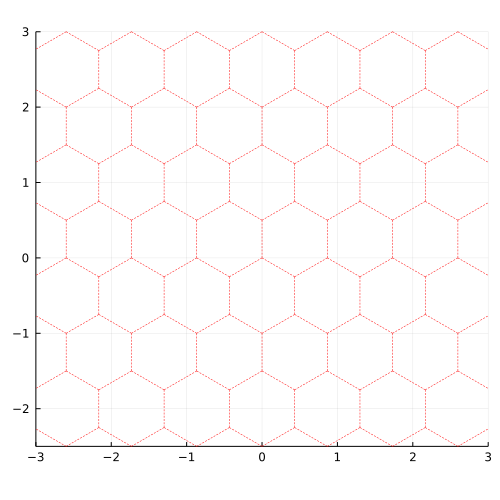

In [1]:
using Plots

a = 0.5
x0 = (i*sqrt(3)*a for i in -3:3)
x1 = (i*sqrt(3)*a + sqrt(3)*a/2 for i in -4:3)
y0 = ( 2j   *1.5*a for j in -2:2)
y1 = ((2j+1)*1.5*a for j in -2:1)

c = "red"
lw = 0.5
ls = :dash

plot(size=(500,500), legend=false)

for y in y0
    for x in x0
        plot!([x, x            ], [y, y+a  ], color=c, lw=lw, ls=ls)
        plot!([x, x-sqrt(3)*a/2], [y, y-a/2], color=c, lw=lw, ls=ls)
        plot!([x, x+sqrt(3)*a/2], [y, y-a/2], color=c, lw=lw, ls=ls)
    end
end

for y in y1
    for x in x1
        plot!([x, x            ], [y, y+a  ], color=c, lw=lw, ls=ls)
        plot!([x, x-sqrt(3)*a/2], [y, y-a/2], color=c, lw=lw, ls=ls)
        plot!([x, x+sqrt(3)*a/2], [y, y-a/2], color=c, lw=lw, ls=ls)
    end
end

plot!(xlim=(-3,3), ylim=(-2.5,3))
plot!(aspect_ratio=:equal)

グラフェンは、このような構造で最近接原子同士のホッピングが有限であり、それ以外はゼロとなっている。この結晶構造をタイトバインディング模型として考えたい。まず、このハチの巣構造をよく眺めてみると、二種類の原子があることがわかる。

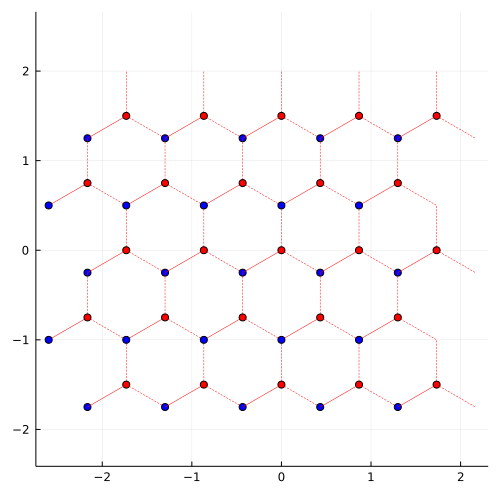

In [2]:
using Plots

a = 0.5
x0 = (i*sqrt(3)*a for i in -2:2)
x1 = (i*sqrt(3)*a + sqrt(3)*a/2 for i in -3:1)
y0 = ( 2j   *1.5*a for j in -1:1)
y1 = ((2j+1)*1.5*a for j in -1:0.5)

c = "red"
b = "blue"
lw = 0.5
ls = :dash

plot(size=(500,500), legend=false)

for y in y0
    for x in x0
        plot!([x, x            ], [y, y+a  ], color=c, lw=lw, ls=ls)
        plot!([x],[y],marker=:circle,color=c)
        plot!([x-sqrt(3)*a/2], [y-a/2],marker=:circle,color=b)
        plot!([x, x-sqrt(3)*a/2], [y, y-a/2], color=c, lw=lw)
        plot!([x, x+sqrt(3)*a/2], [y, y-a/2], color=c, lw=lw,ls=ls)
    end
end

for y in y1
    for x in x1
        plot!([x, x            ], [y, y+a  ], color=c, lw=lw, ls=ls)
        plot!([x, x-sqrt(3)*a/2], [y, y-a/2], color=c, lw=lw)
        plot!([x],[y],marker=:circle,color=c)
        plot!([x-sqrt(3)*a/2], [y-a/2],marker=:circle,color=b)
        plot!([x, x+sqrt(3)*a/2], [y, y-a/2], color=c, lw=lw, ls=ls)
    end
end


plot!(aspect_ratio=:equal)


六角形の一番上の原子を赤色、その横の原子を青色とした。このとき、左下が青色右上が赤色の線分が周期的に並んでいるとみなすことができる。この二つの原子の塊を「ユニットセル」と呼ぶ。
赤色を軌道1、青色を軌道2とする。それぞれの原子は、
- 赤色：x方向に+1ずれた青色とy方向に+1ずれた青色、そして、同一ユニットセル内の青色と接続
- 青色：x方向に-1ずれた赤色とy方向に-1ずれた赤色、そして、同一ユニットセル内の赤色と接続

となっている。ここで、原子にラベルをつける。考えているユニットセルを(ix,iy)とし、軌道の情報も含めて、(a,ix,iy)とする。このとき、
- 赤色(1,ix,iy):(2,ix+1,iy)、(2,ix,iy+1)、(2,ix,iy)
- 青色(2,ix,iy):(1,ix-1,iy)、(1,ix,iy-1)、(1,ix,iy)

というラベルを割り当てることができる。
この割り当てをもちいて、ハミルトニアンを作ると、

In [5]:
function calc_HGraphene(Nx,Ny,μ)
    N = Nx*Ny*2
    mat_Htb = zeros(Float64,N,N)   
    mat_Htb += (-μ)*Matrix(I,N,N) #eye(N)
    t = 1.0
    for ix =1:Nx
        for iy=1:Ny            
            for dx in -1:1
                for dy in -1:1
                    jx = ix + dx
                    
                    jx += ifelse(jx > Nx,-Nx,0)
                    jx += ifelse(jx < 1,Nx,0)
                    
                    jy = iy + dy
                    jy += ifelse(jy > Ny,-Ny,0)
                    jy += ifelse(jy < 1,Ny,0)
                    
 
                    for a=1:2
                        b = ifelse(a ==1,2,1)
                        ii = ((iy-1)*Nx+ix-1)*2+a
                        jj = ((jy-1)*Nx+jx-1)*2+b

                        if dx == 0 && dy == 0
                            mat_Htb[ii,jj] = t
                        elseif dx == +1 && dy==0 && a ==1
                            mat_Htb[ii,jj] = t
                        elseif dx == 0 && dy == 1 && a ==1
                            mat_Htb[ii,jj] = t
                        elseif dx == -1 && dy ==0 && a ==2
                            mat_Htb[ii,jj] = t
                        elseif dx ==0 && dy == -1 && a ==2
                            mat_Htb[ii,jj] = t
                        end
                    end
                    

                end
            end
        end
    end
                    
        
    return mat_Htb
end

calc_HGraphene (generic function with 1 method)

となる。これを対角化しヒストグラムを見てみると、

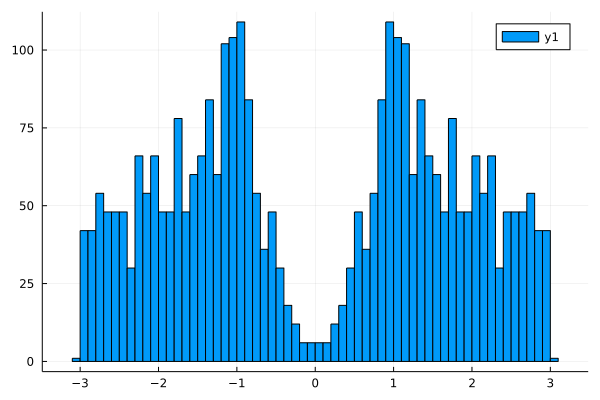

In [6]:
using LinearAlgebra
Nx = 40
Ny = 40
μ = 0
mat_H = calc_HGraphene(Nx,Ny,μ)
#println(mat_H)
energy,mat_v = eigen(mat_H)
histogram(energy,bins=100)

これを見ると、ゼロエネルギーの固有値がとても少ないことがわかる。この原因を探るために、片方をフーリエ変換してみよう。$x$方向だけフーリエ変換することを考える。ここで、コード中のdxを用いて$\exp(i kx dx)$とすれば、簡単にフーリエ変換を実行できる。グラフェンの場合、cosやsinではなく、$\exp(i kx dx)$のような項が残り、行列は複素数のエルミート行列となる。Juliaでは、実数でも複素数でもeigで対角化をすることができる。ハミルトニアンは、

In [7]:
function calc_HGraphenekx(kx,Ny,μ)
    N = Ny*2
    mat_Htb = zeros(Complex{Float64},N,N)   
    mat_Htb += (-μ)*Matrix(I,N,N)#eye(N)
    t = 1.0
    for iy=1:Ny            
        for dy in -1:1              
            jy = iy + dy
            jy += ifelse(jy > Ny,-Ny,0)
            jy += ifelse(jy < 1,Ny,0)
                    
            for a=1:2
                b = ifelse(a ==1,2,1)
                ii = (iy-1)*2+a
                jj = (jy-1)*2+b

                if dy == 0 && a == 1
                    mat_Htb[ii,jj] = t+t*exp(im*kx)                        
                elseif dy == 1 && a ==1
                    mat_Htb[ii,jj] = t
                elseif dy ==0 && a ==2
                    mat_Htb[ii,jj] = t+t*exp(-im*kx)
                elseif dy == -1 && a ==2
                    mat_Htb[ii,jj] = t
                end
            end
                    

        end
    end
                    
        
    return mat_Htb
end

calc_HGraphenekx (generic function with 1 method)

となる。この模型のバンドを描いてみると、

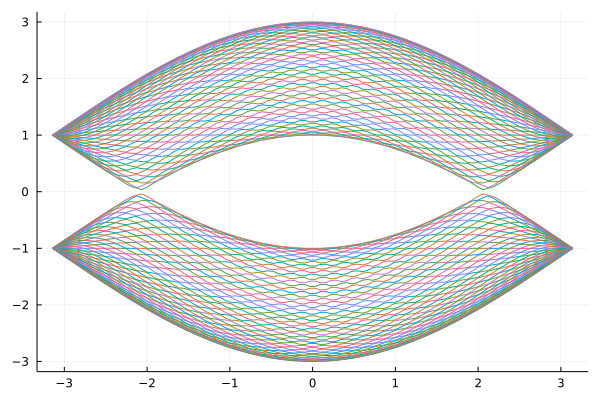

In [8]:
μ=0.0
Ny = 50
nkx = 100
vkx = range(-π,π,length = nkx)
ep = zeros(Float64,nkx,Ny*2)
cnt = 0
for kx in vkx    
    cnt += 1
    mat_H = calc_HGraphenekx(kx,Ny,μ)
    energy,mat_v = eigen(mat_H)
    for i=1:Ny*2
        #println(energy[i])
        ep[cnt,i] = energy[i]
    end
end
plot(vkx,ep)
plot!(legend=false)

となる。これをみると、特定の波数においてゼロエネルギーになっていることがわかる。
さらにkyについてもフーリエ変換してみよう。ここで、y方向の原子の間隔は、x方向の原子の間隔
よりも短いことに注意しよう。青色の三角形を考えたとき、x方向の原子の間隔ははこの三角形の辺の長さに等しいが、y方向の長さは頂点から辺に垂直におろした線分の長さに等しいので、$\sqrt{3}/2$倍だけ長さが短い。ハミルトニアンは

In [9]:
function calc_HGraphenekxky(kx,ky,μ)
    N = 2
    mat_Htb = zeros(Complex{Float64},N,N)   
    mat_Htb += (-μ)*Matrix(I,N,N)#eye(N)
    t = 1.0
    c = sqrt(3)/2
#    for iy=1:Ny            
#        for dy in -1:1              
#            jy = iy + dy
#            jy += ifelse(jy > Ny,-Ny,0)
#            jy += ifelse(jy < 1,Ny,0)
                    
            for a=1:2
                b = ifelse(a ==1,2,1)
                ii = a
                jj = b

                if a == 1
                    mat_Htb[ii,jj] = t+t*exp(im*kx)+t*exp(im*ky+c)                        
#                elseif dy == 1 && a ==1
#                    mat_Htb[ii,jj] = t
                elseif a ==2
                    mat_Htb[ii,jj] = t+t*exp(-im*kx)+t*exp(-im*ky*c)
#                elseif dy == -1 && a ==2
#                    mat_Htb[ii,jj] = t
                end
            end
                    

#        end
#    end
                    
        
    return mat_Htb
end

calc_HGraphenekxky (generic function with 1 method)

となるが、これは

In [10]:
 calc_HGraphenekxky(1.0,2.2,μ)

2×2 Matrix{ComplexF64}:
     0.0+0.0im      0.141175+2.76362im
 1.21204-1.78606im       0.0+0.0im

であり、対角要素をもたない2x2の行列なので簡単に固有値を求めることができ、
$$
E = \pm t \sqrt{(1 + e^{i k_x } + e^{i k_y \sqrt{3}/2})(1 + e^{-i k_x } + e^{-i k_y\sqrt{3}/2)}}
$$
とである。整理すると
$$
E = \pm t \sqrt{1 + e^{i k_x} + e^{-i k_x} + 1+ e^{i k_y \sqrt{3}/2} + e^{-i k_y \sqrt{3}/2} + e^{i k_x} e^{- i k_y \sqrt{3}/2} + e^{i k_y \sqrt{3}/2} e^{- i k_x} + 1}
$$
$$
E = \pm \sqrt{3 + 2 \cos k_x + 2 \cos (k_y \sqrt{3}/2) + 2 \cos (k_x-k_y \sqrt{3}/2)}
$$
となる。このエネルギーをプロットしてみると、

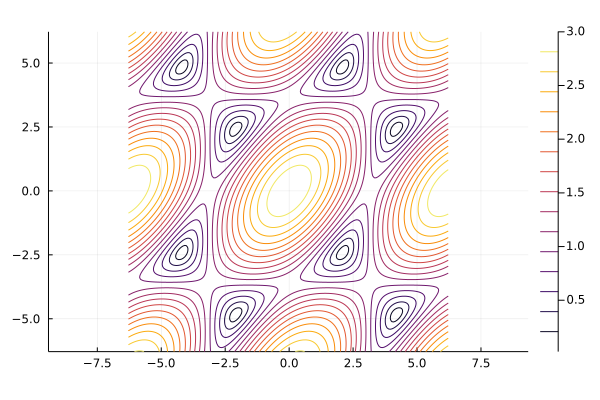

In [11]:

f(kx,ky) = sqrt(3 + 2*cos(kx)+2*cos(ky*sqrt(3)/2) + 2*cos(kx-ky*sqrt(3)/2))

x = -2π:2π/100:2π
y = -2π:2π/100:2π
z = [f(i,j) for i in x, j in y]'

plot(x,y,z)
plot!(aspect_ratio=:equal)

プロットが傾いているようにみえるのは、最初にタイトバインディング模型を考えたときのix軸とiy軸が直交してないためである。x方向は青色の横方向であるが、y方向は青色の三角形の頂点の方向に傾いており、60度傾いている。したがって、この60度分を戻してやると

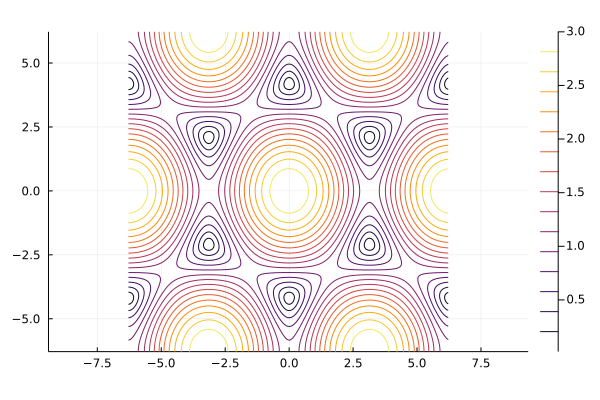

In [12]:
f(kx,ky) = sqrt(3 + 2*cos(kx+ky/2)+2*cos(ky) + 2*cos(kx+ky/2-ky))

x = -2π:2π/100:2π
y = -2π:2π/100:2π
z = [f(i,j) for i in x, j in y]'

plot(x,y,z)
plot!(aspect_ratio=:equal)

のようになり、結晶の六回対称性を持ったエネルギー分散が現れる。ここで、エネルギーがゼロとなっているのは、等高線が三角形になっている部分の中心である。そして、2x2の固有値は二つあり、その二つの固有値はこの中心で両方ともゼロエネルギーになっている。この点を「ディラック点」と呼ぶ。

### 4.2 端状態
最後に、片方だけフーリエ変換をした模型に戻る。この模型のハミルトニアンには周期的境界条件が入っていた。この周期的境界条件はifelse文によって表現されている。この部分をコメントアウトすることで、y方向に垂直な端が導入されることになる。つまり、有限サイズのグラフェンとなる。このときのハミルトニアンは

In [13]:
function calc_HGraphenekx_w(kx,Ny,μ)
    N = Ny*2
    mat_Htb = zeros(ComplexF64,N,N)   
    mat_Htb += (-μ)*Matrix(I,N,N)#eye(N)
    t = 1.0
    for iy=1:Ny            
        for dy in -1:1              
            jy = iy + dy
            #jy += ifelse(jy > Ny,-Ny,0)
            #jy += ifelse(jy < 1,Ny,0)
                    
            for a=1:2
                b = ifelse(a ==1,2,1)
                ii = (iy-1)*2+a
                jj = (jy-1)*2+b
                if 1 <= jy <= Ny
                    if dy == 0 && a == 1
                        mat_Htb[ii,jj] = t+t*exp(im*kx)                        
                    elseif dy == 1 && a ==1
                        mat_Htb[ii,jj] = t
                    elseif dy ==0 && a ==2
                        mat_Htb[ii,jj] = t+t*exp(-im*kx)
                    elseif dy == -1 && a ==2
                        mat_Htb[ii,jj] = t
                    end
                end
            end
                    

        end
    end
                    
        
    return mat_Htb
end

calc_HGraphenekx_w (generic function with 1 method)

であり、固有値を計算してみると、

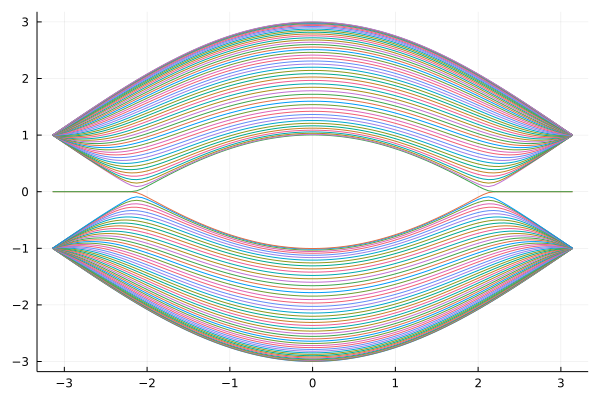

In [15]:
μ=0.0
Ny = 50
nkx = 100
vkx = range(-π,π,length=nkx)
ep = zeros(Float64,nkx,Ny*2)
cnt = 0
for kx in vkx    
    cnt += 1
    mat_H = calc_HGraphenekx_w(kx,Ny,μ)
    energy,mat_v = eigen(mat_H)
    for i=1:Ny*2
        #println(energy[i])
        ep[cnt,i] = energy[i]
    end
end
plot(vkx,ep)
plot!(legend=false)

となって、ゼロエネルギーに新しい固有値が出現している。特にフラットになっている。
どのような波動関数になっているかを調べるために、$k_x = \pi$近傍の固有関数をプロットしてみると、 

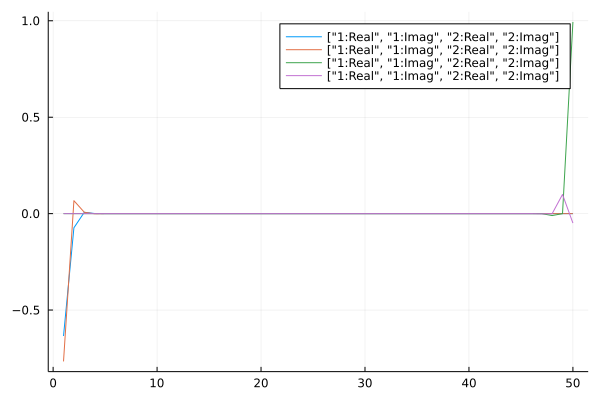

In [16]:
kx = π-0.1
Ny = 50
mat_H = calc_HGraphenekx_w(kx,Ny,μ)
energy,mat_v = eigen(mat_H)
yv = []
ψ1 = []
ψ2 = []
for i in 1:Ny
    push!(yv,i)
    push!(ψ1,mat_v[2*i,Ny])
    push!(ψ2,mat_v[2*i-1,Ny+1])
end
plot(yv,[real.(ψ1),imag.(ψ1),real.(ψ2),imag.(ψ2)],label=["1:Real","1:Imag","2:Real","2:Imag"])

となる。ここで、エネルギーが縮退しているので、両方の固有値の波動関数をプロットしてみた。わかるのは、この二つの波動関数は、ともに、端に局在している、ということである。なお、今考えている端は、最初に図を描いた六角格子の一番上と同じ状況になっており、この端があるグラフェンのことを「ジグザググラフェン」と呼ぶ。次のノートでは、もう一つのグラフェンである、「アームチェアグラフェン」について調べてみる。